# Compras, Compras, Compras! - Análise de E-commerce

Uma empresa de e-commerce cedeu gentilmente dados sobre seus usuários e seus respectivos padrões de consumo. A empresa está tentando decidir entre focar esforços em sua experiência mobile ou em seu website. 

A base conta com dados como e-mail do consumidor, avatar, endereço, entre outros. O objetivo do projeto é criar um modelo que seja capaz de quantificar o peso de cada variável no padrão de consumo dos clientes. As variáveis disponíveis são:

* __Email__: E-mail do consumidor
* __Address__: Endereço do consumidor
* __Avatar__: Tom de cor do perfil do consumidor
* __Avg. Session Length__: Tempo médio de sessão consultiva, em minutos
* __Time on App__: Tempo médio de navegação no app, em minutos
* __Time on Website__: Tempo médio de navegação no website, em minutos
* __Length of Membership__: Tempo de Filiação, em anos
* __Yearly Amount Spent__: Consumo anual na empresa tanto mobile quanto website, em dólares

# 1) Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
sns.set_style('whitegrid')

# 2) Obtendo os Dados

In [4]:
customers = pd.read_csv('Ecommerce Customers')

In [5]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


# 2.1) Conteúdo das Variáveis

In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
# numeric variables overview
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


# 2.2) Checar Dados Faltantes ou Duplicados

<AxesSubplot:>

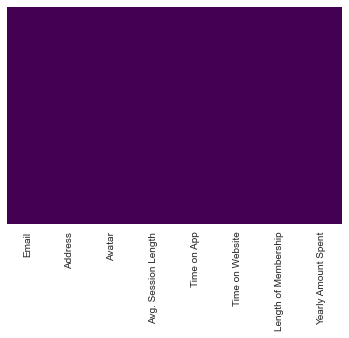

In [10]:
sns.heatmap(data = customers.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

* Sem dados faltantes.

In [12]:
customers.duplicated().value_counts()

False    500
dtype: int64

* Sem dados duplicados.

# 3) Análise Exploratória dos Dados

## 3.1) Variáveis Numéricas

## 3.1.1) Avg. Session Length vs Yearly Amount Spent

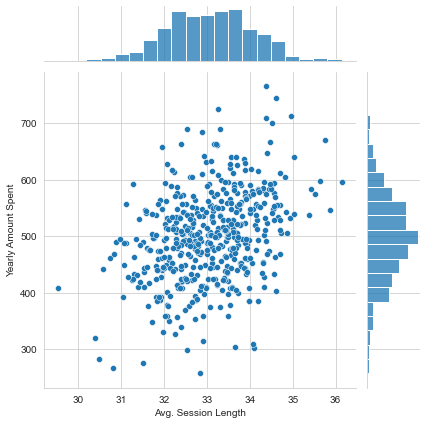

In [13]:
sns.jointplot(data = customers, x = 'Avg. Session Length', y = 'Yearly Amount Spent')

In [16]:
customers['Avg. Session Length'].corr(customers['Yearly Amount Spent'])

0.355088294707643

* Dados indicam baixa correlação positiva entre Tempo Médio de Sessão Consultiva e Consumo Anual.

* Em outras palavras, quanto maior o Tempo Médio de Sessão Consultiva, maior a chance de ter consumido mais.

## 3.1.2) Time on App vs Yearly Amount Spent

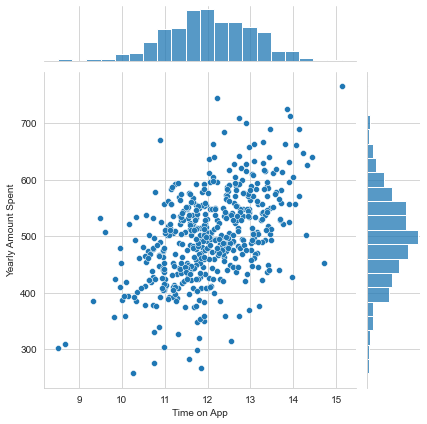

In [18]:
sns.jointplot(data = customers, x = 'Time on App', y = 'Yearly Amount Spent')

In [20]:
customers['Time on App'].corr(customers['Yearly Amount Spent'])

0.49932777005345036

* Dados indicam correlação positiva moderada entre Tempo de Navegação no App e Consumo Anual.

* Em outras palavras, quanto maior o Tempo de Navegação no App, maior a chance de ter consumido mais.

## 3.1.3) Time on Website vs Yearly Amount Spent

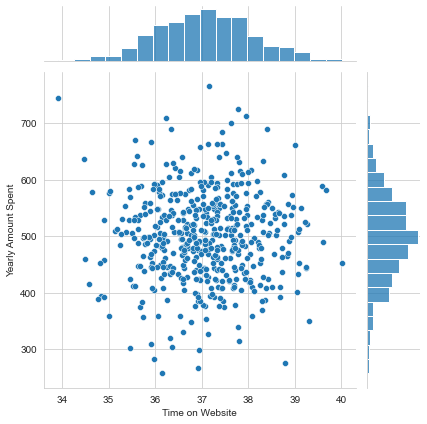

In [21]:
sns.jointplot(data = customers, x = 'Time on Website', y = 'Yearly Amount Spent')

In [23]:
customers['Time on Website'].corr(customers['Yearly Amount Spent'])

-0.0026408446721588536

* Dados indicam correlação irrelevante entre Tempo de Navegação no Website e Consumo Anual.

* Em outras palavras, o Tempo de Navegação no Website não é um bom preditor do consumo anual de um consumidor.

## 3.1.4) Length of Membership vs Yearly Amount Spent

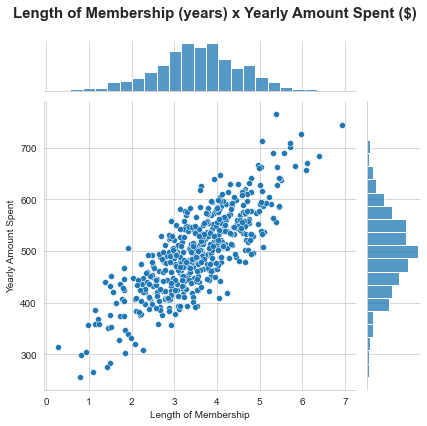

In [24]:
g = sns.jointplot(data = customers, x = 'Length of Membership', y = 'Yearly Amount Spent')
g.fig.suptitle('Length of Membership (years) x Yearly Amount Spent ($)', weight = 'bold', fontsize = 15)
g.fig.subplots_adjust(top=0.90)

In [25]:
customers['Length of Membership'].corr(customers['Yearly Amount Spent'])

0.8090835682475813

* Dados indicam forte correlação positiva entre Tempo de Filiação e Consumo Anual.

* Em outras palavras, quanto maior o Tempo de Filiação, maior a chance de ter consumido mais.

# 3.2) Variáveis Categóricas

In [26]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## 3.2.1) Email

In [28]:
customers['Email'].value_counts()

mstephenson@fernandez.com        1
elizabeth61@berg-braun.com       1
pamelahampton@martin-cobb.com    1
dbell@hotmail.com                1
vancealicia@hotmail.com          1
                                ..
stevenking@patterson.com         1
blevinseric@stephens.com         1
campbellross@yahoo.com           1
casey21@johnson.com              1
hannahwilson@davidson.com        1
Name: Email, Length: 500, dtype: int64

* Os dados brutos não apresentam valor para o modelo.

* Feature engineering para descobrir provedores de email mais frequentes pode ser um caminho para extrair valor destes dados.

## 3.2.2) Address

In [30]:
customers['Address'].value_counts()

835 Frank Tunnel\nWrightmouth, MI 82180-9605                      1
649 King Extension\nNorth April, NY 54175                         1
91542 Jessica Springs Suite 255\nThomashaven, MT 39239-3790       1
3485 Anthony Street Apt. 119\nMikeberg, FL 32602                  1
06307 Scott Spurs Suite 161\nJessicaburgh, NH 26093-5908          1
                                                                 ..
94730 Martin Mount\nNew Matthew, VI 08142-6708                    1
PSC 3676, Box 1549\nAPO AE 26130-7683                             1
6218 Michael Station Apt. 982\nSalazarburgh, NJ 79955             1
691 Johnson Field Apt. 510\nMichaelville, VI 78140                1
49791 Rachel Heights Apt. 898\nEast Drewborough, OR 55919-9528    1
Name: Address, Length: 500, dtype: int64

* Os dados brutos não apresentam valor para o modelo.

* Feature engineering para descobrir estados e cidades pode ser um caminho para extrair valor destes dados.

## 3.2.3) Avatar

In [32]:
customers['Avatar'].value_counts()

SlateBlue               7
Cyan                    7
CadetBlue               7
GreenYellow             7
Teal                    7
                       ..
MediumPurple            1
CornflowerBlue          1
LightGoldenRodYellow    1
PowderBlue              1
LawnGreen               1
Name: Avatar, Length: 138, dtype: int64

* Os dados brutos não apresentam valor para o modelo.

* Feature engineering para descobrir cores do arco-íris pode ser um caminho para extrair valor destes dados.

* Em outras palavras, ao invés de 138 tons de cores, teríamos apenas 7 categorias.

## 3.3) Matriz de Correlação Entre Variáveis

<AxesSubplot:>

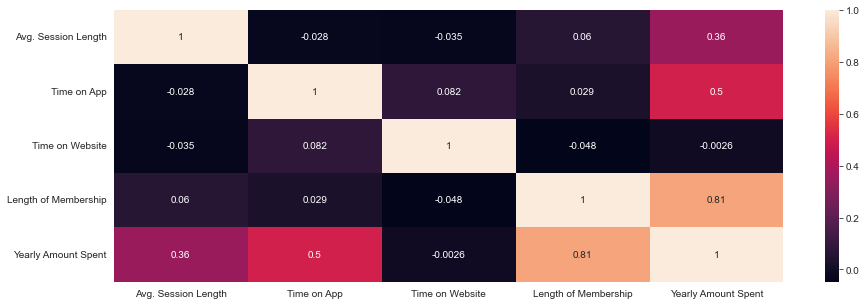

In [20]:
plt.figure(figsize=(15,5))
sns.heatmap(data = customers.corr(), annot = True)

Tier List Correlações com Variável Resposta "Yearly Amount Spent":
* 1) Length of Membership: 0.81
* 2) Time on App: 0.5
* 3) Avg. Session Length: 0.36
* 4) Time on Website: -0.0026

# 4) Criando o Modelo

# 4.1) Separação de Dados de Treino e Teste

In [21]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## 4.2) Treinando o Modelo

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
model = LinearRegression()

In [39]:
model.fit(X_train, y_train)

LinearRegression()

In [40]:
# coefficients
coefficients = pd.DataFrame(data = model.coef_, index = X.columns, columns = ['Values'])

In [42]:
coefficients

,Values
Avg. Session Length,26.029489
Time on App,38.709835
Time on Website,0.356184
Length of Membership,61.472809


## 4.3) Predições do Modelo

In [33]:
pred = model.predict(X_test)

Text(0, 0.5, 'Predictions')

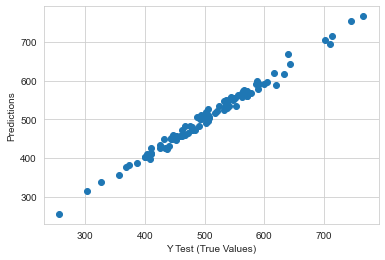

In [34]:
# scatter plot of real vs predicted values --> the closer to a line, the better
plt.scatter(y_test, pred)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predictions')

## 4.4) Avaliando o Modelo

In [38]:
from sklearn import metrics

### 4.4.1) MAE --> Mean Absolute Error

In [36]:
mae = metrics.mean_absolute_error(y_test, pred)

In [37]:
mae

7.758907540457854

### 4.4.2) MSE --> Mean Squared Error

In [40]:
mse = metrics.mean_squared_error(y_test, pred)

In [41]:
mse

91.82335857016906

### 4.4.3) RMSE --> Root Mean Squared Error

In [43]:
rmse = metrics.mean_squared_error(y_test, pred, squared = False)

In [44]:
rmse

9.582450551407456

### 4.4.4) R²

In [45]:
r2 = metrics.r2_score(y_test, pred)

In [46]:
r2

0.9881661299145553

In [47]:
indicators = pd.array([mae, mse, rmse, r2])

In [48]:
results = pd.DataFrame(data = indicators, index = ['MAE','MSE','RMSE','R²'], columns = ['Values'])

In [50]:
results

,Values
MAE,7.758908
MSE,91.823359
RMSE,9.582451
R²,0.988166


* O resultado encontrado é que 98,81% da variância da variável resposta pode ser explicada pelas variáveis do modelo.

* Em outras palavras, o modelo não performou bem em 1.19% da base de clientes, o que indica um excelente modelo.

# 5) Conclusões 💯

## 5.1) Interpretação dos Coeficientes

In [51]:
coefficients

,Values
Avg. Session Length,26.029489
Time on App,38.709835
Time on Website,0.356184
Length of Membership,61.472809


Podemos interpretar estes dados da seguinte forma:
* Um aumento de 1 unidade no __Tempo de Filiação__ gera um aumento de U\\$61.47 no Consumo Anual.
* Um aumento de 1 unidade no __Tempo de Navegação no Aplicativo__, gera um aumento de U\\$38.71 no Consumo Anual.
* Um aumento de 1 unidade no __Tempo Médio de Sessão Consultiva__ gera um aumento de U\\$26.03 no Consumo Anual.
* Um aumento de 1 unidade no __Tempo de Navegação no Website__ gera um aumento de U\\$0.36 no Consumo Anual.

## 5.2) Evidências 🔍

### 1) Os dados indicam que se a empresa tivesse que escolher entre investir no Aplicativo ou no Website, o Aplicativo poderia trazer ganhos mais significativos.

### 2) No entanto, mais importante do que essa decisão,  os dados indicam que o Tempo de Filiação é o que mais contribui para o Consumo Anual. Em outras palavras, a empresa deveria focar principalmente em estratégias de fidelização, como por exemplo:
* Programa de Pontos
* Comunicações Personalizadas
* Ofertas Exclusivas
* Reengajar o consumidor através de automações de marketing
* Ofertar excelente atendimento ao consumidor (contato direto, documentar feedbacks, pesquisas de satisfação, monitorar redes sociais) 

### 3) Outra forma de olhar para os dados encontrados é que o Aplicativo já performa super bem, mas o Website não. Uma rápida pesquisa sobre a experiência do cliente no Website e no Aplicativo pode indicar pontos positivos e negativos em ambas as plataformas.

### 4) A partir destas informações, a empresa pode perceber que um baixo investimento no Website pode trazer grandes retornos, dado a situação atual muito inferior ao Aplicativo.

### 5) Outro cenário seria descobrir que os clientes simplesmente preferem o Aplicativo ao Website, pela praticidade. Nesse caso, focar em estratégias mobile, como por exemplo:
* Estimular o download através de um cupom de uso único, comunicado por uma campanha de e-mail marketing
* Notificações Push para comunicar novidades e promoções
* Testar todas as telas e funções para evitar problemas de UX (User Experience) e receber boas avaliações
* Otimizar o App para SEO e conseguir downloads assertivos